---------------
# YOLO-V8: (Read the [Docs](https://docs.ultralytics.com/modes/))
-----------------------------------
-----------------

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Jun  6 14:49:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Mount your Google drive
1.   Click the `Files` Icon -> click `Mount drive` Icon.
2.   Change your working directory to your drive so that all the files will be saved to the drive and not the temporary runtime.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

HOME = "/content/drive/MyDrive/Project_BLPR"

In [ ]:
data_folder = f"{HOME}/data"
try:
    os.mkdir(data_folder)
except FileExistsError:
    pass
os.chdir(HOME)
print(os.getcwd())

/content/drive/MyDrive/Project_BLPR


## Install YOLOv8

In [ ]:
# Pip install method (recommended)
%cd
!pip install ultralytics==8.0.112

from IPython import display
display.clear_output()

In [ ]:
# check if installed correctly
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## General Imports

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Downloading our custom dataset from Roboflow in Yolo-V8 format

In [ ]:
DATASET_NAME = "lp_bb_v4_yoloV8"
DATASET_DIR = f"{HOME}/data/{DATASET_NAME}"

In [ ]:
try:
    os.mkdir(DATASET_DIR)
except FileExistsError:
    pass

# os.chdir(DATASET_DIR)
# !curl -L "https://app.roboflow.com/ds/8U3aSbrEG1?key=jShptDr5Gm" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd {HOME}
%pwd

/content/drive/MyDrive/Project_BLPR


'/content/drive/MyDrive/Project_BLPR'

## Training a Custom Model

In [ ]:
MODEL_PATH = f"{HOME}/yolov8m.pt"
DATA_YAML = f"{DATASET_DIR}/data.yaml"

LP_BB_Model_Dir = f"{HOME}/model_lp_bb_detection"

PROJECT_NAME = "lp_bb_trained_weights"
PROJECT_PATH = f"{LP_BB_Model_Dir}/{PROJECT_NAME}"

In [ ]:
print("Model Path: ", MODEL_PATH)
print("Data Yaml: ", DATA_YAML)

Model Path:  /content/drive/MyDrive/Project_BLPR/yolov8m.pt
Data Yaml:  /content/drive/MyDrive/Project_BLPR/data/lp_bb_v4_yoloV8/data.yaml


In [ ]:
%cd {LP_BB_Model_Dir}

/content/drive/MyDrive/Project_BLPR


In [ ]:
model = YOLO(MODEL_PATH)

In [ ]:
# model.train(data=DATA_YAML, epochs=75, patience=10, batch=32, imgsz=640, workers=16, cache=True, project=PROJECT_NAME, seed=3, plots=True)

from IPython import display

display.clear_output()

In [ ]:
last_pt = YOLO(f"{PROJECT_PATH}/train/weights/last.pt")

In [ ]:
# last_pt.train(data=DATA_YAML, resume=True, project=PROJECT_NAME, plots=True)
display.clear_output()

In [ ]:
!ls {PROJECT_PATH}/train/

args.yaml					   results.png
confusion_matrix_normalized.png			   train_batch0.jpg
confusion_matrix.png				   train_batch1.jpg
events.out.tfevents.1686021207.7c9ed3fe4069.564.0  train_batch2.jpg
events.out.tfevents.1686054223.c5deceda7aad.252.0  val_batch0_labels.jpg
F1_curve.png					   val_batch0_pred.jpg
labels_correlogram.jpg				   val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
P_curve.png					   val_batch2_labels.jpg
PR_curve.png					   val_batch2_pred.jpg
R_curve.png					   weights
results.csv


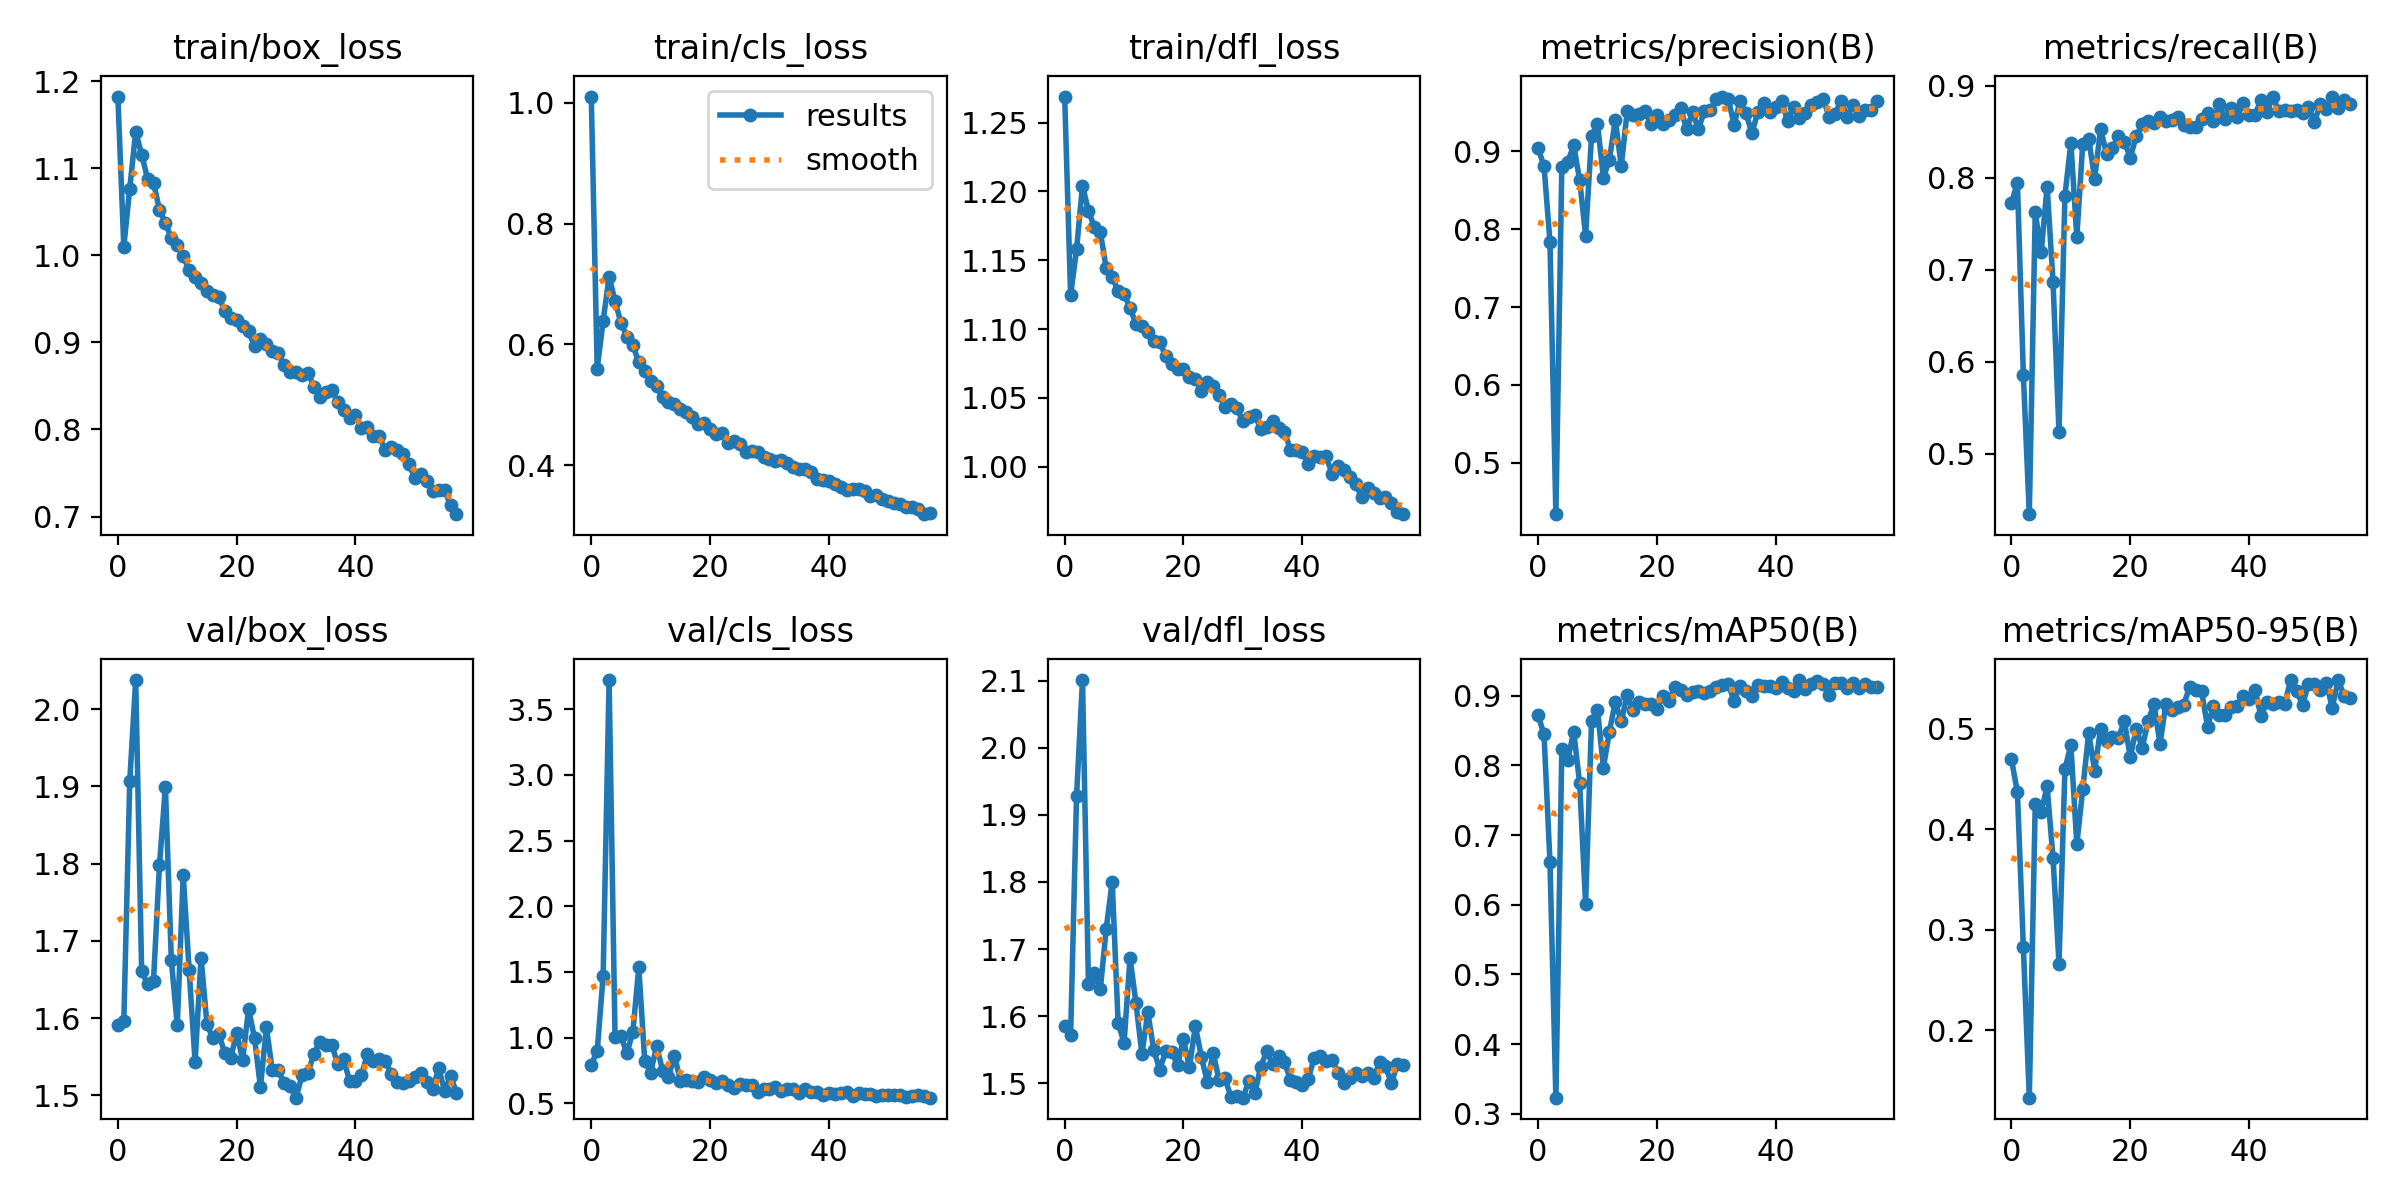

In [ ]:
Image(filename=f"{PROJECT_PATH}/train/results.png", width=600)

## Validate Custom Model

In [ ]:
best_pt = YOLO(f"{PROJECT_PATH}/train/weights/best.pt")

In [ ]:
%cd {LP_BB_Model_Dir}
val_metrics = best_pt.val()

/content/drive/MyDrive/Project_BLPR/lp_bb_trained_weights


Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients
100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]
val: Scanning /content/drive/MyDrive/Project_BLPR/data/lp_bb_v4_yoloV8/valid/labels.cache... 1454 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1454/1454 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:52<00:00,  1.73it/s]
                   all       1454       1549      0.964      0.873      0.922      0.549
Speed: 0.3ms preprocess, 20.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val


## Testing the Custom Model

In [ ]:
test_metrics = best_pt.val(split="test")

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/drive/MyDrive/Project_BLPR/data/lp_bb_v4_yoloV8/test/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [04:29<00:00,  2.98it/s]
val: New cache created: /content/drive/MyDrive/Project_BLPR/data/lp_bb_v4_yoloV8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:24<00:00,  2.05it/s]
                   all        801        810      0.983       0.99      0.991      0.601
Speed: 0.9ms preprocess, 21.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val2


## Inference with Custom Model

In [ ]:
%cd {LP_BB_Model_Dir}
results = best_pt.predict(source=f'{DATASET_DIR}/test/images/**', conf=0.25, save=True, show_labels=False)[0]

display.clear_output()

**NOTE:** Let's take a look at few results.

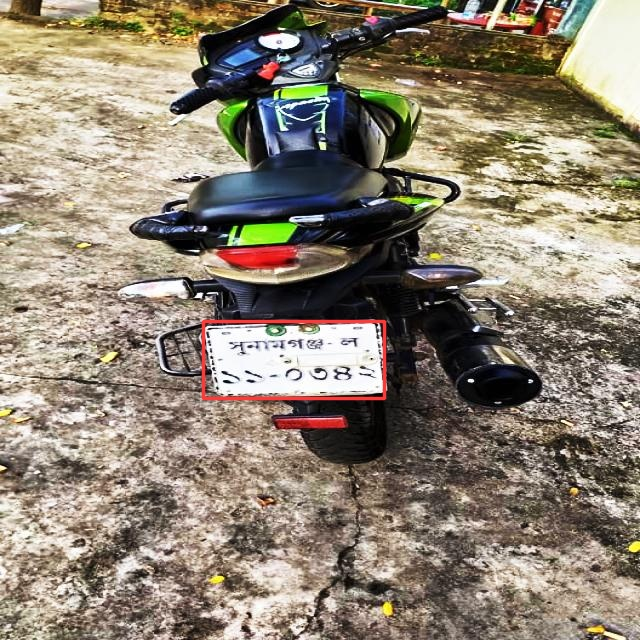

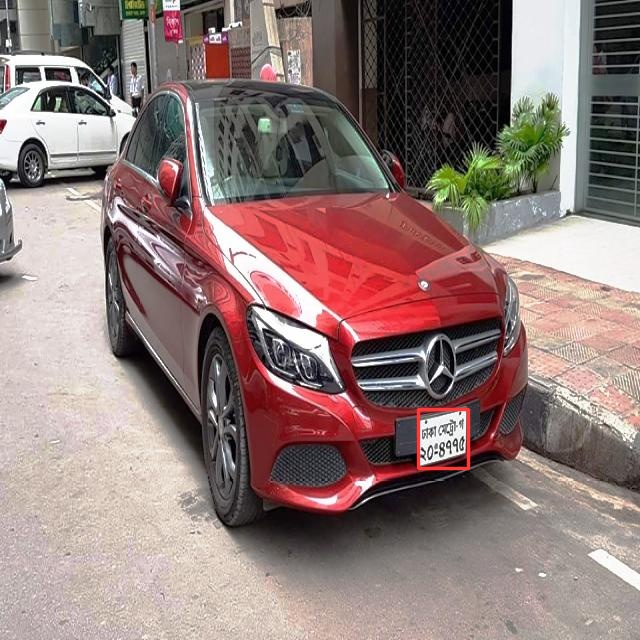

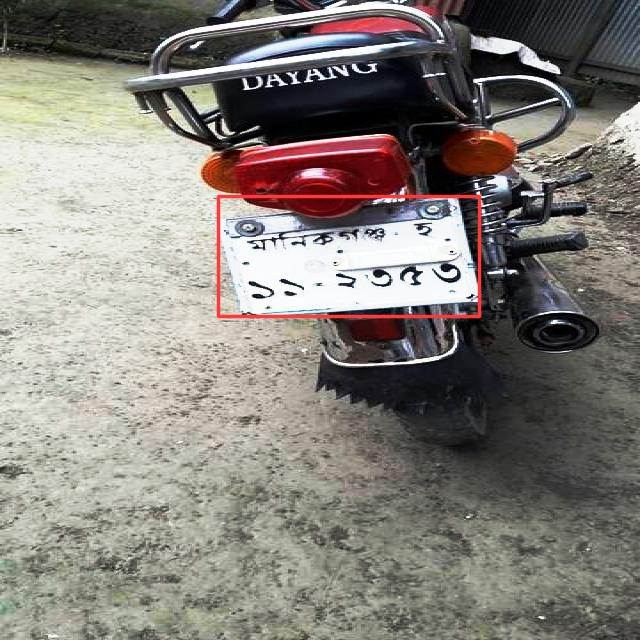

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f"{PROJECT_PATH}/runs/detect/predict/*.jpg")[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")